<a href="https://colab.research.google.com/github/eprayoga/klasifikasi_jenis_pisang_CNN/blob/main/KlasifikasiJenisPisang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#install kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"endangprayoga","key":"e2b4c3d8556351c51e96c9ca6bd1fa1d"}'}

In [59]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [60]:
! cp kaggle.json ~/.kaggle/

In [61]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [62]:
#to list all dataset in kaggle
! kaggle dataset list

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [63]:
!kaggle datasets download -d alviansyz/pisang

 67% 9.00M/13.3M [00:00<00:00, 35.2MB/s]
100% 13.3M/13.3M [00:00<00:00, 47.4MB/s]


In [64]:
!mv pisang.zip tmp/

In [65]:
import zipfile

zip_ref = zipfile.ZipFile("tmp/pisang.zip", 'r')
zip_ref.extractall("input/")
zip_ref.close()

In [66]:
import os
from sklearn.metrics import classification_report, confusion_matrix
try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os

for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
input/susu/images (8).jpg
input/susu/images - 2020-11-12T165805.142.jpg
input/susu/images - 2020-11-12T165803.564.jpg
input/susu/download (22).jpg
input/susu/images - 2020-11-12T165804.736.jpg
input/susu/images (77).jpg
input/susu/images - 2020-11-12T165806.033.jpg
input/susu/images (86).jpg
input/susu/images - 2020-11-12T165804.984.jpg
input/susu/images (43).jpg
input/susu/download (25).jpg
input/susu/download (20).jpg
input/susu/images - 2020-11-12T165803.388.jpg
input/susu/images (12).jpg
input/susu/images (32).jpg
input/susu/images (31).jpg
input/susu/images (34).jpg
input/susu/images (9).jpg
input/susu/images - 2020-11-12T165806.036.jpg
input/susu/download (12).jpg
input/susu/images - 2020-11-12T165803.882.jpg
input/susu/images - 2020-11-12T165804.411.jpg
input/susu/images (69).jpg
input/susu/images - 2020-11-12T165803.664.jpg
input/susu/images - 2020-11-12T165805.659.jpg
input/susu/images (88).jpg
input/susu/i

In [67]:
X=[]
Z=[]
IMG_SIZE=100
AMBON_DIR='input/ambon'
BARANGAN_DIR='input/barangan'
CAVENDISH_DIR='input/cavendish'
GENDERUWO_DIR='input/genderuwo'
JAVAICECREAM_DIR='input/javaicecream'
KEPOK_DIR='input/kepok'
MAS_DIR='input/mas'
NANGKA_DIR='input/nangka'
RAJA_DIR='input/raja'
SUSU_DIR='input/susu'
TANDUK_DIR='input/tanduk'
ULI_DIR='input/uli'

In [68]:
def assign_label(img,banana_type):
    return banana_type

In [69]:
import cv2
import numpy as np
from tqdm import tqdm

def make_train_data(banana_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,banana_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [70]:
make_train_data('Ambon',AMBON_DIR)
print(len(X)) 

100%|██████████| 100/100 [00:00<00:00, 1097.46it/s]

100


In [71]:
make_train_data('Barangan',BARANGAN_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 900.36it/s]

200


In [72]:
make_train_data('Cavendish',CAVENDISH_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1270.37it/s]

300


In [73]:
make_train_data('Genderuwo',GENDERUWO_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1082.22it/s]


400


In [74]:
make_train_data('Javaicecream',JAVAICECREAM_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 182.82it/s]

500


In [75]:
make_train_data('Kepok',KEPOK_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1175.67it/s]

600


In [76]:
make_train_data('Mas',MAS_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 835.98it/s]

700


In [77]:
make_train_data('nangka',NANGKA_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 713.65it/s]

800


In [78]:
make_train_data('Raja',RAJA_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 716.22it/s]

900


In [79]:
make_train_data('Susu',SUSU_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1090.80it/s]

1000


In [80]:
make_train_data('Tanduk',TANDUK_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1111.55it/s]

1100


In [81]:
make_train_data('Uli',ULI_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1255.63it/s]

1200


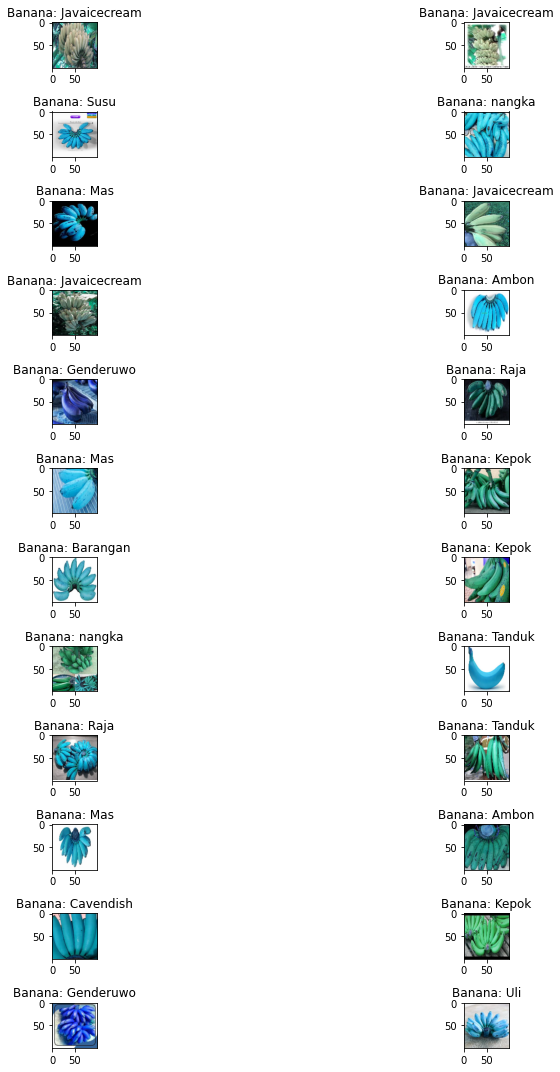

In [82]:
import matplotlib.pyplot as plt
import random as rn

fig,ax=plt.subplots(12,2)
fig.set_size_inches(15,15)
for i in range(12):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Banana: '+Z[l])
        
plt.tight_layout()

In [83]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,12)
X=np.array(X)
X=X/255

In [84]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [85]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [86]:
# # modelling starts using a CNN.
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (12,12),padding = 'Same',activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(12, activation = "softmax"))

In [87]:
batch_size=100
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [88]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [89]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
#model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
9/9 [==============================] - 56s 6s/step - loss: 2.4691 - accuracy: 0.1211 - val_loss: 2.3284 - val_accuracy: 0.1200
Epoch 2/50
9/9 [==============================] - 42s 5s/step - loss: 2.4031 - accuracy: 0.1233 - val_loss: 2.4325 - val_accuracy: 0.1133
Epoch 3/50
9/9 [==============================] - 42s 5s/step - loss: 2.4429 - accuracy: 0.1411 - val_loss: 2.3733 - val_accuracy: 0.1567
Epoch 4/50
9/9 [==============================] - 42s 5s/step - loss: 2.3202 - accuracy: 0.1800 - val_loss: 2.2606 - val_accuracy: 0.1767
Epoch 5/50
9/9 [==============================] - 48s 5s/step - loss: 2.2496 - accuracy: 0.1778 - val_loss: 2.2357 - val_accuracy: 0.1567
Epoch 6/50
9/9 [==============================] - 43s 5s/step - loss: 2.2084 - accuracy: 0.1978 - val_loss: 2.2266 - val_accuracy: 0.1733
Epoch 7/50
9/9 [==============================] - 43s 5s/step - loss: 2.1884 - accuracy: 0.1933 - val_loss: 2.2074 - val_accuracy: 0.1833
Epoch 8/50
9/9 [==================

In [91]:
model.save('working/modelpisang2.h5')

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      13856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 96)      

In [93]:
new_model = tf.keras.models.load_model('working/modelpisang2.h5')

In [94]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      13856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 96)      

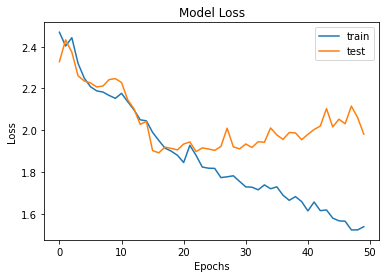

In [95]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

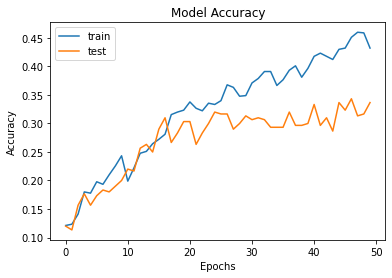

In [96]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [97]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

10/10 [==============================] - 4s 341ms/step


In [98]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

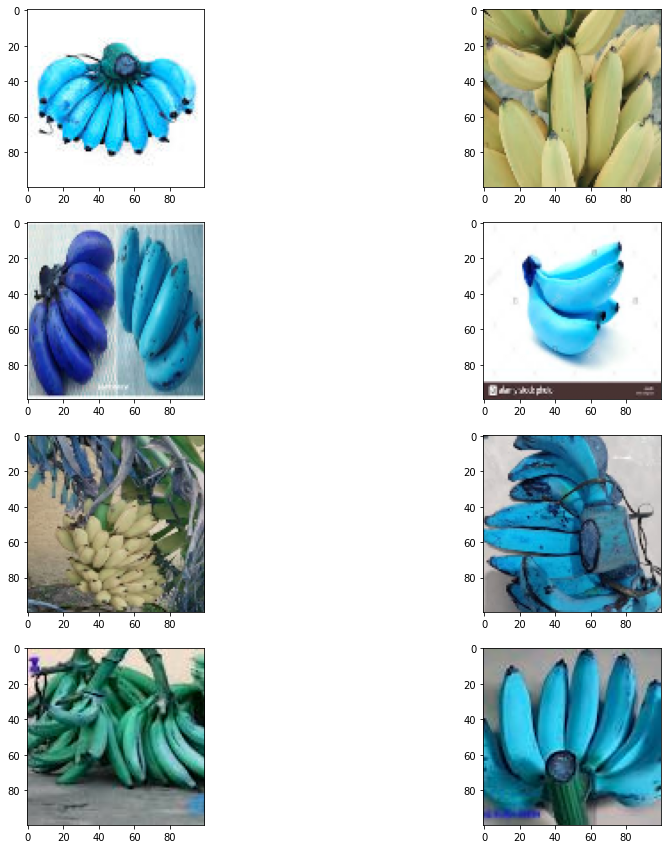

In [99]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
      
        count+=1

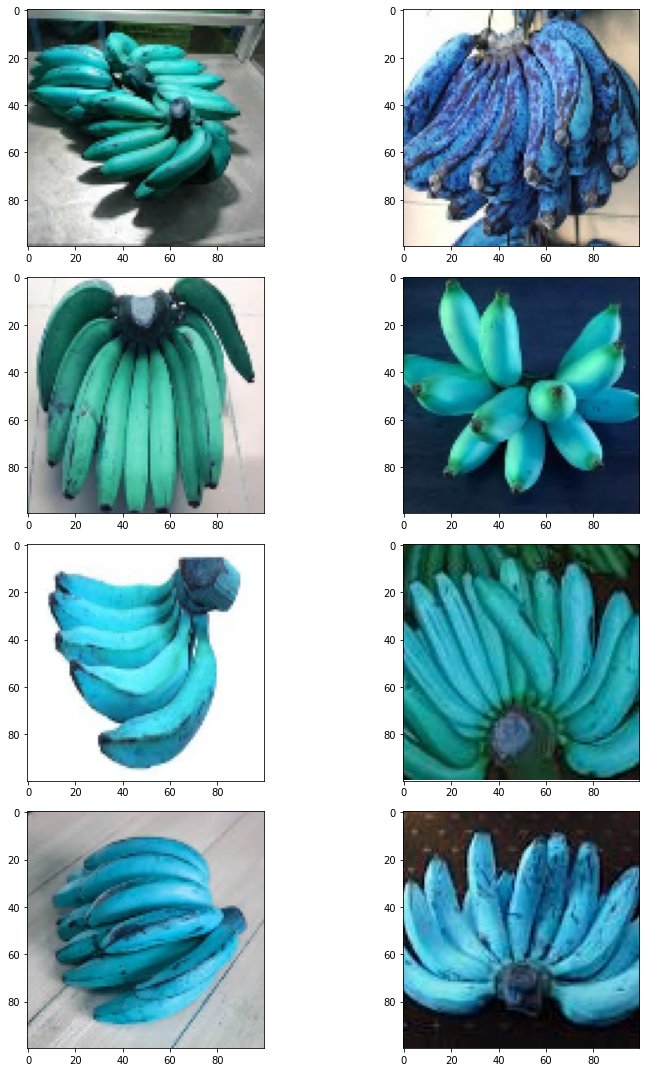

In [100]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        plt.tight_layout()
        count+=1

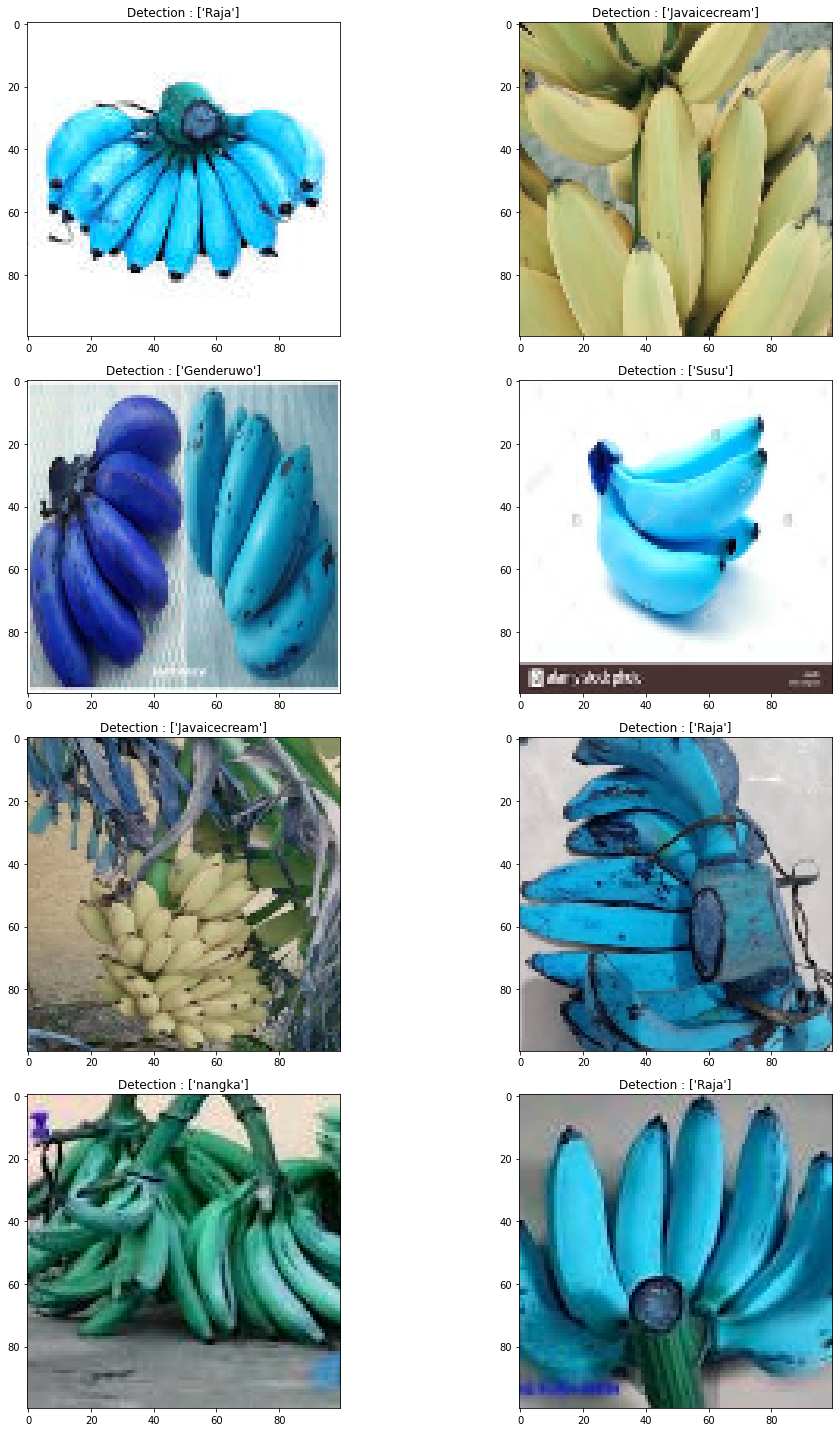

In [102]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(20,20)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Detection : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1